# MPO 762 - Problem Set 1

### Tiago Carrilho Bilo 
### C$\#$11950866


## 1 Finite Difference Derivation

#### Derivation of 5th-order finite difference approximation to the first derivative of a function $u = u(x)$ using two different stencils. The derivarion will be performed by using the symbolic manipulation commands in matlab. 


Being $_{i}$ the spatial indexation we want derive a discretized derivative using the following data points:

1) $u_{i-3}$, $u_{i-2}$, $u_{i-1}$, $u_{i}$, $u_{i+1}$, and $u_{i+2}$

2) $u_{i-4}$, $u_{i-3}$, $u_{i-2}$, $u_{i-1}$, $u_{i}$, and $u_{i+1}$



Notation: 

- $u_{x} = \frac{d u}{d x} = $ first derivative

    $u_{2x} = \frac{d^{2} u}{d x^{2}} = $ second derivative

    $u_{3x} = \frac{d^{3} u}{d x^{3}} = $ third derivative

    $u_{nx} = \frac{d^{n} u}{d x^{n}} = $ n$^{th}$ derivative
        
    
    
    
- $dx = \Delta x = $ grid spacing
    
    
    
    
- $x1p = x_{i+1} = x_{i} + \Delta x$ = specific grid cell indexation

    $x1m = x_{i+1} = x_{i} - \Delta x$

    $x2p = x_{i+1} = x_{i} + (2 \times \Delta x)$

    $x2m = x_{i+1} = x_{i} - (2 \times \Delta x)$     



First of all lets define some symbolic variables and our discretized axis: 

In [1]:
% Clear memory
clear all

% Defining the symbolic variables
syms x dx xi u ux u2x u3x u4x u5x u6x real 

Invalid variable name "matrix(0, 1, [])" in ASSIGNIN.


In [2]:
u_x = sym('u(x)');

disp('[output]')
disp(['Discretized x-axis'])
X = [xi-4*dx, xi-3*dx, xi-2*dx, xi-dx, xi, xi+dx, xi+2*dx, xi+3*dx, xi+4*dx]

[output]
Discretized x-axis
 
X =
 
[ xi - 4*dx, xi - 3*dx, xi - 2*dx, xi - dx, xi, dx + xi, 2*dx + xi, 3*dx + xi, 4*dx + xi]


Assuming the function $u(x)$ being continuous to the 6th-order derivative and the discretized x-axis equally spaced, we can approximate $u(x)$ by its Taylor series expansion around $x_{i}$: 

In [3]:
% Computing the symbolic Taylor series expansion around xi, the truncation error will be of order 6 
Taylor = taylor(u_x,x,'ExpansionPoint',xi,'Order',7);    

% Replacing the original symbolic derivatives for a more user-friendly notation defined above
Taylor = subs(Taylor,'D(u)(xi)',ux);
Taylor = subs(Taylor,'D(D(u))(xi)',u2x);
Taylor = subs(Taylor,'D(D(D(u)))(xi)',u3x);
Taylor = subs(Taylor,'D(D(D(D(u))))(xi)',u4x);
Taylor = subs(Taylor,'D(D(D(D(D(u)))))(xi)',u5x);
Taylor = subs(Taylor,'D(D(D(D(D(D(u))))))(xi)',u6x);

disp('[output]')
disp('Taylor series expansion of u(x) around xi:')
disp(Taylor)

[output]
Taylor series expansion of u(x) around xi:
u(xi) + ux*(x - xi) + (u2x*(x - xi)^2)/2 + (u3x*(x - xi)^3)/6 + (u4x*(x - xi)^4)/24 + (u5x*(x - xi)^5)/120 + (u6x*(x - xi)^6)/720


From the expression above we can: 

##### 1) obtain the value of u(x) at any point around to $x_{i}$:


In [4]:
% 1) Replacing x by the values around xi especified by the discretized x-axis (X)
u_x4m = subs(Taylor,'x',X(1));
u_x3m = subs(Taylor,'x',X(2));
u_x2m = subs(Taylor,'x',X(3));
u_x1m = subs(Taylor,'x',X(4));
u_x1p = subs(Taylor,'x',X(6));
u_x2p = subs(Taylor,'x',X(7));
u_x3p = subs(Taylor,'x',X(8));
u_x4p = subs(Taylor,'x',X(9));


disp('[output]')
disp('Example: u at xi + 2dx')
disp(u_x2p)


[output]
Example: u at xi + 2dx
(4*u6x*dx^6)/45 + (4*u5x*dx^5)/15 + (2*u4x*dx^4)/3 + (4*u3x*dx^3)/3 + 2*u2x*dx^2 + 2*ux*dx + u(xi)


##### 2) find the expression for $u_{x}$ using the desired stencils:

In [5]:
% 2) Finding the expression for ux

% Defining a coefficients vector
A = sym('a', [1 5]); 

disp('[output]')
disp('Coefficients A')
disp(A)

% Coefficients assignment for the different stencils
S1 = [u_x3m,u_x2m,u_x1m,u_x1p,u_x2p]; S1 = A.*S1;
S2 = [u_x4m,u_x3m,u_x2m,u_x1m,u_x1p]; S2 = A.*S2;


% Summing up the expressions for the different stencils
S1 = sum(S1);
S2 = sum(S2); 


[output]
Coefficients A
[ a1, a2, a3, a4, a5]


As we can see, the sum of the Taylor series for each stencil allow us to combine the coefficents in order to writte expressions of the form: 

Stencil 1: $a_{1} u_{i-3} + a_{2} u_{i-2} + a_{3} u_{i-1} + a_{4} u_{i+1} + a_{5} u_{i+2} = a_{0} u_{i} + B_{1} u_{x} \Delta X + B_{2} u_{2x} \Delta X^{2} + B_{3} u_{3x} \Delta X^{3} + B_{4} u_{4x} \Delta X^{4} + B_{5} u_{5x} \Delta X^{5} + B_{6} u_{6x} \Delta X^{6} + ... $


Stencil 2: $a_{1} u_{i-4} + a_{2} u_{i-3} + a_{3} u_{i-2} + a_{4} u_{i-1} + a_{5} u_{i+1} = a_{0} u_{i} + B_{1} u_{x} \Delta X + B_{2} u_{2x} \Delta X^{2} + B_{3} u_{3x} \Delta X^{3} + B_{4} u_{4x} \Delta X^{4} + B_{5} u_{5x} \Delta X^{5} + B_{6} u_{6x} \Delta X^{6} + ... $


where Bs are real coefficients and $a_{0} = a_{1} + a_{2} + a_{3} + a_{4} + a_{5}$.



In [6]:
% Stencil 1:
disp('[output]')
disp('Stencil 1:')


% note : the following scheme allow us to get and display the coefficients B

C = coeffs(S1,ux);
B1 = simplify(C(end)/(dx))

C = coeffs(S1,u2x);
B2 = simplify(C(end)/(dx^2))

C = coeffs(S1,u3x);
B3 = simplify(C(end)/(dx^3))

C = coeffs(S1,u4x);
B4 = simplify(C(end)/(dx^4))

C = coeffs(S1,u5x);
B5 = simplify(C(end)/(dx^5))

C = coeffs(S1,u6x);
B6 = simplify(C(end)/(dx^6))

BS1 = [B1,B2,B3,B4,B5];

[output]
Stencil 1:
 
B1 =
 
a4 - 2*a2 - a3 - 3*a1 + 2*a5
 
 
B2 =
 
(9*a1)/2 + 2*a2 + a3/2 + a4/2 + 2*a5
 
 
B3 =
 
a4/6 - (4*a2)/3 - a3/6 - (9*a1)/2 + (4*a5)/3
 
 
B4 =
 
(27*a1)/8 + (2*a2)/3 + a3/24 + a4/24 + (2*a5)/3
 
 
B5 =
 
a4/120 - (4*a2)/15 - a3/120 - (81*a1)/40 + (4*a5)/15
 
 
B6 =
 
(81*a1)/80 + (4*a2)/45 + a3/720 + a4/720 + (4*a5)/45


In [7]:
% Stencil 2:
disp('[output]')
disp('Stencil 2:')

C = coeffs(S2,ux);
B1 = simplify(C(end)/(dx))

C = coeffs(S2,u2x);
B2 = simplify(C(end)/(dx^2))

C = coeffs(S2,u3x);
B3 = simplify(C(end)/(dx^3))

C = coeffs(S2,u4x);
B4 = simplify(C(end)/(dx^4))

C = coeffs(S2,u5x);
B5 = simplify(C(end)/(dx^5))

C = coeffs(S2,u6x);
B6 = simplify(C(end)/(dx^6))

BS2 = [B1,B2,B3,B4,B5];

[output]
Stencil 2:
 
B1 =
 
a5 - 3*a2 - 2*a3 - a4 - 4*a1
 
 
B2 =
 
8*a1 + (9*a2)/2 + 2*a3 + a4/2 + a5/2
 
 
B3 =
 
a5/6 - (9*a2)/2 - (4*a3)/3 - a4/6 - (32*a1)/3
 
 
B4 =
 
(32*a1)/3 + (27*a2)/8 + (2*a3)/3 + a4/24 + a5/24
 
 
B5 =
 
a5/120 - (81*a2)/40 - (4*a3)/15 - a4/120 - (128*a1)/15
 
 
B6 =
 
(256*a1)/45 + (81*a2)/80 + (4*a3)/45 + a4/720 + a5/720


Therefore, in order to get the 5th finete difference approximations of the first derivatives we can obtain the coefficients A by seting $B_{2}, B_{3}, B_{4}, B_{5} = 0$ and $B_{1} = 1$. 

Then, we solve the linear system 5x5 of the type $M \times A = B$:  

$$\begin{bmatrix}
M_{l1} & M_{l2} & M_{l3} & M_{l4} & M_{l5} \\
M_{21} & M_{22} & M_{23} & M_{24} & M_{25} \\
M_{31} & M_{32} & M_{33} & M_{34} & M_{35} \\
M_{41} & M_{42} & M_{43} & M_{44} & M_{45} \\
M_{51} & M_{52} & M_{53} & M_{54} & M_{55}
\end{bmatrix}  \times 
\begin{bmatrix}
a_{l} \\
a_{2} \\
a_{3} \\
a_{4} \\
a_{5}
\end{bmatrix} 
=
\begin{bmatrix}
B_{1} \\
B_{2} \\
B_{3} \\
B_{4} \\
B_{5} \\
\end{bmatrix}
$$






In [8]:
% Stencil 1

% Display the system in a matrix form
disp('[output]')
disp('Linear System for Stencil 1')
[M,B] = equationsToMatrix([BS1(1)==1, BS1(2)==0, BS1(3)==0, BS1(4)==0,BS1(5)==0], [A(1), A(2), A(3), A(4), A(5)])

% Solving the system
disp('Solutions of A')
AS1 = linsolve(M,B)

disp('Coefficient a0')
a0_s1 = sum(AS1)

[output]
Linear System for Stencil 1
 
M =
 
[     -3,    -2,     -1,     1,    2]
[    9/2,     2,    1/2,   1/2,    2]
[   -9/2,  -4/3,   -1/6,   1/6,  4/3]
[   27/8,   2/3,   1/24,  1/24,  2/3]
[ -81/40, -4/15, -1/120, 1/120, 4/15]
 
 
B =
 
 1
 0
 0
 0
 0
 
Solutions of A
 
AS1 =
 
 -1/30
   1/4
    -1
   1/2
 -1/20
 
Coefficient a0
 
a0_s1 =
 
-1/3


In [9]:
% Stencil 2

% Display the system in a matrix form
disp('[output]')
disp('Linear System for Stencil 1')
[M,B] = equationsToMatrix([BS2(1)==1, BS2(2)==0, BS2(3)==0, BS2(4)==0,BS2(5)==0], [A(1), A(2), A(3), A(4), A(5)])

% Solving the system
disp('Solutions of A')
AS2 = linsolve(M,B)

disp('Coefficient a0')
a0_s2 = sum(AS2)

[output]
Linear System for Stencil 1
 
M =
 
[      -4,     -3,    -2,     -1,     1]
[       8,    9/2,     2,    1/2,   1/2]
[   -32/3,   -9/2,  -4/3,   -1/6,   1/6]
[    32/3,   27/8,   2/3,   1/24,  1/24]
[ -128/15, -81/40, -4/15, -1/120, 1/120]
 
 
B =
 
 1
 0
 0
 0
 0
 
Solutions of A
 
AS2 =
 
 1/20
 -1/3
    1
   -2
  1/5
 
Coefficient a0
 
a0_s2 =
 
-13/12


Now we can rewritte the Taylor series expantions as: 

Stencil 1: $u_{x} = \frac{a_{1} u_{i-3} + a_{2} u_{i-2} + a_{3} u_{i-1} + a_{4} u_{i+1} + a_{5} u_{i+2} - a_{0} u_{i}}{\Delta x} - B_{6} u_{6x} \Delta X^{5} + ...$


Stencil 2: $u_{x} = \frac{a_{1} u_{i-4} + a_{2} u_{i-3} + a_{3} u_{i-2} + a_{4} u_{i-1} + a_{5} u_{i+1} - a_{0} u_{i}}{\Delta X} - B_{6} u_{6x} \Delta X^{5} + ... $


Replacing the values of A in both expressions and multipling them for 60 we get: 

Stencil 1: $u_{x} = \frac{- 2 u_{i-3} + 15 u_{i-2} - 60 u_{i-1} + 20 u_{i} + 30 u_{i+1} - 3 u_{i+2}}{60 \Delta x} - \frac{1}{60} \frac{u_{6x} \Delta X^{5}}{60} + ...$

Stencil 2: $u_{x} = \frac{3 u_{i-4} - 20 u_{i-3} + 60 u_{i-2} - 120 u_{i-1} + 65 u_{i} + 12 u_{i+1}}{60 \Delta X} + \frac{1}{30} \frac{u_{6x} \Delta X^{5}}{60} + ... $


### Therefore, since $\frac{1}{60} = \frac{12}{6!}$ we get: 

###  Stencil 1: $u_{x} = \frac{- 2 u_{i-3} + 15 u_{i-2} - 60 u_{i-1} + 20 u_{i} + 30 u_{i+1} - 3 u_{i+2}}{60 \Delta x} - \frac{12}{60} \frac{u_{6x} \Delta X^{5}}{6!} + ...$

### Stencil 2: $u_{x} = \frac{3 u_{i-4} - 20 u_{i-3} + 60 u_{i-2} - 120 u_{i-1} + 65 u_{i} + 12 u_{i+1}}{60 \Delta X} + \frac{24}{60} \frac{u_{6x} \Delta X^{5}}{6!} + ... $


## 2 Programming discretization of a grid


The discretization of a 1-D grid is performed by using the following function:


```Octave
function [x,xe,dx] = FDGrid(xmin,xmax,N)
    %
    % Returns the coordinates of the cell (x), grid cell edges (xe), and the spacing (dx) 
    % of an equally spaced 1-D numerical grid.  
    % 
    % 
    % Input:  
    %	xmin and xmax: interval limits of the grid 
    %		 
    %	N: Number of grid cells 
    %   
    % Example: 
    %
    %			>> [x,xe,dx] = FDGrid(0,10,5)
    %			x = 
    %				[1,3,5,7,9]
    % 			
    %			xe = 
    %				[0,2,4,6,8,10]
    %
    %	  
    %			dx = 			
    % 				2
    %
    %	
    %	Grid: 
    %	
    %   0       1     2     3      4      5     6     7     8      9    10
    %	|       .     |     .      |      .     |     .     |      .     |
    %  xe1     x1    xe2    x2    xe3    x3    xe4   x4    xe5     x5    xe6         
    %
    % 
    % Author: Tiago Bilo
    % CFD - Fall 2016 
    % Problem set 1: 
    % 2. Programing discretization of a grid 

    % Grid spacing
    dx = (xmax-xmin)/N;

	% Grid cell coordinates
    x = [xmin+(dx/2.0):dx:xmax-(dx/2.0)];

	% Coordinates of the grid cell edges 
    xe = [xmin:dx:xmax];
```


In [11]:
% Clear the memory
clear all

% Grid discretization
[x,xe,dx] = FDGrid(-1,1,1000);

disp('[outputs]')
disp('Variables dimensions')
whos 

disp('Grid spacing dx')
disp(dx)

disp('Grid interval')
disp(['[',num2str(min(xe)),',',num2str(max(xe)),']'])


[outputs]
Variables dimensions
  Name      Size              Bytes  Class     Attributes

  dx        1x1                   8  double              
  x         1x1000             8000  double              
  xe        1x1001             8008  double              

Grid spacing dx
    0.0020

Grid interval
[-1,1]


##### Computing the following periodic functions at xe

$$ u(x) = tanh\{\alpha[cos(\pi x) + \frac{1}{2}])\} + e^{-cos^{2}(\pi x)} $$

and 

$$ u_{x}(x) = \pi sin(\pi x) \{\alpha[tanh^{2}(\alpha cos(\pi x) + \frac{\alpha}{2}) - 1] + 2cos(\pi x) e^{-cos^{2}(\pi x)}\} $$

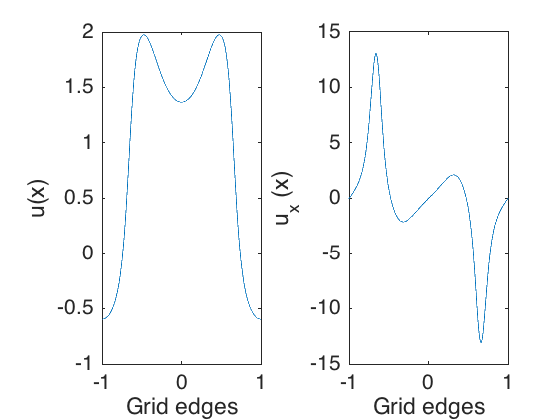

In [12]:
% Periodic functions for a = 4
a = 4.0; 
cosine = cos(pi.*xe);
sine = sin(pi.*xe);
expn = exp(-(cosine.^2.0));

u = tanh(a.*(cosine + 0.5)) + expn; 
ux = pi.*sine.*(a.*((tanh(a.*(cosine+0.5)).^2.0) - 1) + 2.0.*cosine.*expn); 


% Plotting the periodic functions
figure(1);
h = subplot(1,2,1); 
plot(xe,u)
xlabel('Grid edges')
ylabel('u(x)')
ylim([-1 2])


subplot(1,2,2)
plot(xe,ux)
xlabel('Grid edges')
ylabel('u_x (x)')



Figure 1. Plots of the function u(x) (left panel) and its derivative (right panel)

## 3 Programing Finite Diference Calculations

Assuming a periodic function $u(x)$ of the form: 

$$u(x) = tanh\{\alpha[cos(\pi x) + \frac{1}{2}])\} + e^{-cos^{2}(\pi x)}$$


Lets implement a numerical differentiation of the first derivative $u_{x}$:

$$u_{x}(x) = \pi sin(\pi x) \{\alpha[tanh^{2}(\alpha cos(\pi x) + \frac{\alpha}{2}) - 1] + 2cos(\pi x) e^{-cos^{2}(\pi x)}\}$$


Using a 5th-order finite difference approximation: 

i. e., 

$$u_{x}(x) = \frac{- 2 u_{i-3} + 15 u_{i-2} - 60 u_{i-1} + 20 u_{i} + 30 u_{i+1} - 3 u_{i+2}}{60 \Delta x} - \frac{12}{60} \frac{u_{6x} \Delta X^{5}}{6!} + ...$$




In [13]:
% Clear the memory 
clear all

% Defining the domain
xmin = -1.0; 
xmax = 1.0; 

% Different number of grid cells 
N = [10,20,40,80,100,200,400,800,1600,3200];


% Function params 
a = 4.0; 

for it = 1:length(N)

    % Discretized grid
    [x,xe,dx] = FDGrid(xmin,xmax,N(it));

    % Number of edges: length(xe) = N+1
    Ne = N(it)+1;

    % Function 
    cosine = cos(pi.*xe);
    sine = sin(pi.*xe);
    expn = exp(-(cosine.^2.0));    
    
        
    u = tanh(a.*(cosine + 0.5)) + expn; 
    
    % Exact derivative
    ux = pi.*sine.*(a.*((tanh(a.*(cosine+0.5)).^2.0) - 1) + 2.0.*cosine.*expn);


    %% Numerical derivative using our 5th-order finite difference approximation
    % Middle of the domain
    ux_n = zeros(1,Ne); 
    ux_n(4:Ne-2) = -2*u(1:Ne-5)+15*u(2:Ne-4)-60*u(3:Ne-3)+20*u(4:Ne-2)+30*u(5:Ne-1)-3*u(6:Ne);



    % Close to the boundaries (Periodic boundary condition)
    % 
    % Periodic boundary condition: first and last values of the function are the "same"
    %
    % "eastern" boundary: i = Ne-1 and i = Ne
    ux_n(Ne-1) = -2*u(Ne-4)+15*u(Ne-3)-60*u(Ne-2)+20*u(Ne-1)+30*u(Ne)-3*u(2);
    ux_n(Ne) = -2*u(Ne-3)+15*u(Ne-2)-60*u(Ne-1)+20*u(Ne)+30*u(2)-3*u(3);

    % "western" boundary: i = 3, i = 2 and i = 1
    ux_n(3) = -2*u(Ne-1)+15*u(1)-60*u(2)+20*u(3)+30*u(4)-3*u(5);
    ux_n(2) = -2*u(Ne-2)+15*u(Ne-1)-60*u(1)+20*u(2)+30*u(3)-3*u(4);    
    ux_n(1) = -2*u(Ne-3)+15*u(Ne-2)-60*u(Ne-1)+20*u(1)+30*u(2)-3*u(3); 

    ux_n = ux_n./(60.0*dx);


    % Keep the different dx
    Dx(it) = dx;

    % Error Measurements (epsilon)
    err = ux_n-ux;                     % error in derivative at the edges
    err_max(it) = max(abs(err));       % maximum error
    err_rms(it)=sqrt(sum(err.^2)).*dx; % rms error

    disp(' ')
    disp('[output]')
    disp(['N = ',num2str(N(it)),' grid cells'])
    disp(['dx = ',num2str(Dx(it))])    
    disp(['Maximum error = ', num2str(err_max(it))]) 
    disp(['RMS error = ', num2str(err_rms(it))])
    disp(' ')    
    
end 



[output]
N = 10 grid cells
dx = 0.2
Maximum error = 3.9094
RMS error = 1.0669
 
 
[output]
N = 20 grid cells
dx = 0.1
Maximum error = 1.0235
RMS error = 0.16867
 
 
[output]
N = 40 grid cells
dx = 0.05
Maximum error = 0.24355
RMS error = 0.022755
 
 
[output]
N = 80 grid cells
dx = 0.025
Maximum error = 0.013575
RMS error = 0.00084676
 
 
[output]
N = 100 grid cells
dx = 0.02
Maximum error = 0.0051885
RMS error = 0.00027454
 
 
[output]
N = 200 grid cells
dx = 0.01
Maximum error = 0.0016759
RMS error = 1.7999e-05
 
 
[output]
N = 400 grid cells
dx = 0.005
Maximum error = 0.00083769
RMS error = 4.1911e-06
 
 
[output]
N = 800 grid cells
dx = 0.0025
Maximum error = 0.0004188
RMS error = 1.047e-06
 
 
[output]
N = 1600 grid cells
dx = 0.00125
Maximum error = 0.00020939
RMS error = 2.6174e-07
 
 
[output]
N = 3200 grid cells
dx = 0.000625
Maximum error = 0.0001047
RMS error = 6.5435e-08


Just looking at the numerical differentiation errors ($|\epsilon|$) whe can verify that its magnitude decreases as $\Delta x$ increase as the theory predicts. I. e., the RMS error is $\sim O(\Delta x^{5})$. 

#### Convergence diagrams


 added to session magics.



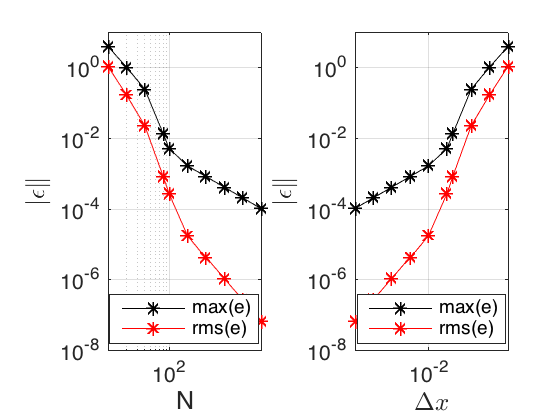

In [14]:
%%% Plotting the convergence digrams
%% Epsilon x N
figure(2)
subplot(1,2,1)
loglog(N,err_max,'k-*',N,err_rms,'r-*');

axis([N(1) N(end) 1.e-8 10]);
xlabel('N','FontSize',12); 
ylabel('$|\epsilon\|$','Interpret','latex','FontSize',12);

grid 'on'
legend('max(e)','rms(e)','Location','Best')

%% Epsilon x Dx
subplot(1,2,2)
loglog(Dx,err_max,'k-*',Dx,err_rms,'r-*');

axis([Dx(end) Dx(1) 1.e-8 10]);
xlabel('$\Delta x$','Interpret','latex','FontSize',12); 
ylabel('$|\epsilon\|$','Interpret','latex','FontSize',12);

grid 'on'
legend('max(e)','rms(e)','Location','Best')

Figure 2. Truncation error as a function of the number of grid cell N (left panel), and as a function of the grid spacing $\Delta x$ (right panel). 

As we can see in Figure 2, the maximum error and the RMS error decrease as expected. Therefore, our Finite Difference Approximation (FDA) is consistent and the solution converges to the exact form of $u_{x}$ (see Figure 3). 

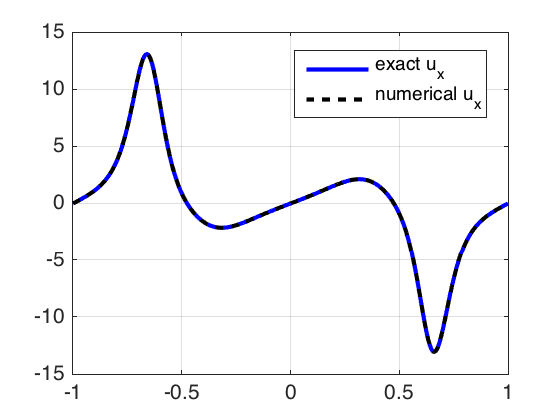

In [15]:
% plotting ux_n against the exact expression of ux
figure(3)
plot(xe,ux_n,'b',xe,ux,'k--','linewidth',2.0)
legend('exact u_x','numerical u_x')

grid 'on'

Figure 3. Comparison between the exact expression of $u_{x}$ and the numerical differentiation. 

In order to be more quantitative, lets study the slope of the RMS($\epsilon$) against $\Delta x$. Therefore lets performe a linear fitting of the red curve in the right panel of Figure 2. 

Theoretical linear model: 

$$RMS(\epsilon) = A \Delta x^{5}$$
    
or 
    
$$ln[RMS(\epsilon)] = 5 ln(\Delta x) + ln(A)$$    



In [17]:
%%% Linear fitting 

[slope,lnA] = polyfit(log(Dx), log(err_rms), 1);

disp('[output]')
disp(['Slope: ', num2str(slope(1))])

 added to session magics.

[output]
Slope: 3.0015


Note the slope is approximately 3 instead of 5. However we should keep in mind that for very small $\Delta x$ (i. e., $\Delta x \le 10^{-2}$) the solution tends to change less than when $\Delta x \ge 10^{-2}$ (see Figure 2), so the slope is reasonable considering the order of magnitude of the rms errors.

## 4 Drifter Velocity Calculations

Lets derive the meridional (u) and zonal (v) velocities of drifters from the GLAD experiment. The latitudes $\theta$ and longitude $\lambda$ time series can be converted to u and v by applying: 

$$u = R cos(\theta) \frac{\partial \lambda}{\partial t}$$

and 

$$u = R \frac{\partial \theta}{\partial t}$$

where R is the Earth's radius.

In [18]:
% Clear data 
clear all 

% Loading the data from GLAD experiment
[date,hour,lat,lon] = textread('CARTHE_007.dat','%s%s%f%f','headerlines',0);


% As we can see from the data file the data is spaced
% in approximatelly 15 min
disp('[output]')
disp('grid spacing sample')
disp([date(1:10),hour(1:10)])


% grid spacing in s
dt = 15.0*60.0;


% Earth's radius (m) 
R = 6371000.0;

[output]
grid spacing sample
    '2012-07-20'    '11:00:00.126717'
    '2012-07-20'    '11:15:00.129600'
    '2012-07-20'    '11:30:00.132474'
    '2012-07-20'    '11:45:00.135357'
    '2012-07-20'    '12:00:00.138241'
    '2012-07-20'    '12:15:00.141114'
    '2012-07-20'    '12:30:00.143997'
    '2012-07-20'    '12:45:00.146881'
    '2012-07-20'    '13:00:00.149754'
    '2012-07-20'    '13:15:00.152637'


##### The dataset

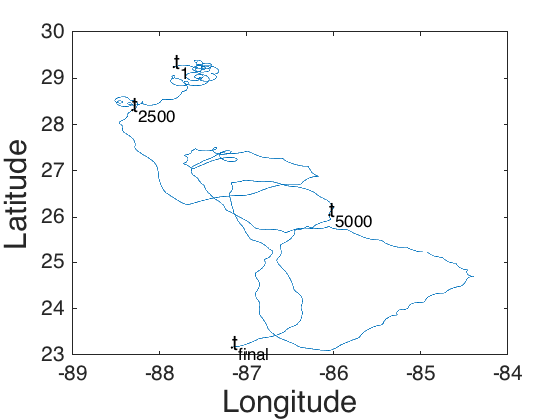

In [19]:
figure(4)
plot(lon,lat)
hold 'on'
plot(lon([1 2500 5000 length(lon)]),lat([1 2500 5000 length(lon)]),'k.')
text(lon([1 2500 5000 length(lon)]),lat([1 2500 5000 length(lon)]),{'t_1','t_{2500}','t_{5000}','t_{final}'})

xlabel('Longitude','fontsize',15)
ylabel('Latitude','fontsize',15)

Figure 4. Tractory of a drifter from the GLAD experiment. The black dots pinpoint different instants (t1, t2500, t5000,tfinal) of the time series.

##### Velocity estimates

In order to estimate $\frac{\partial \lambda}{\partial t}$ and $\frac{\partial \theta}{\partial t}$ we used the functions cd2.m and cd4.m to estimate the 2nd and 4th order centered difference respectively. Here we will not deal with the derivatives close to the limits of the time series.

In [20]:
% Converting lat and lon in degrees to radians
lonr  = lon*pi/(180.0);
latr = lat*pi/(180.0);


% Second order derivatives
dlon2 = cd2(lonr,dt,0); dlon2([1 2 length(lonr)-1 length(lonr)]) = NaN;
dlat2 = cd2(latr,dt,0); dlat2([1 2 length(lonr)-1 length(lonr)]) = NaN;


% Fourth order derivatives
dlon4 = cd4(lonr,dt,0); dlon4([1 2 length(lonr)-1 length(lonr)]) = NaN;
dlat4 = cd4(latr,dt,0); dlat4([1 2 length(lonr)-1 length(lonr)]) = NaN;


% Computing the velocity components 
u2 = R .* cos(latr') .* dlon2;
v2 = R .* dlat2;

u4 = R .* cos(latr') .* dlon4;
v4 = R .* dlat4;


##### (u,v) evolution

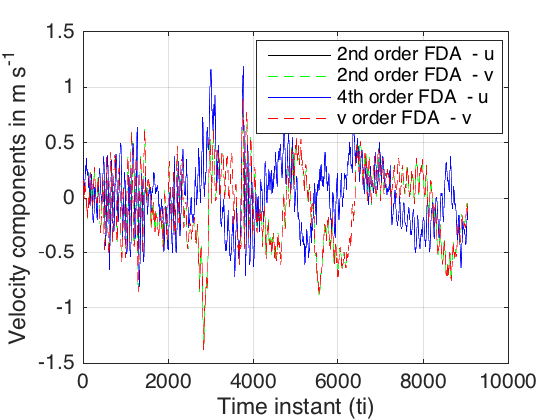

In [21]:
% Functions u and v
figure(5)
plot(u2,'k');
hold 'on'
plot(v2,'g--');

plot(u4,'b');
plot(v4,'r--');

xlabel('Time instant (ti)');
ylabel('Velocity components in m s^{-1}');


grid 'on'
legend('2nd order FDA  - u','2nd order FDA  - v','4th order FDA  - u','v order FDA  - v','Location','Best')


Figure 5. Evolution of u and v using different FDA stencils. 


##### Difference between stencils

From Figure 5 both estimates seem to be in agreement. Therefore, to be more quantitative we need a measure of this difference (i. e., $||\epsilon||$): 


$$
||\epsilon||^{2} = \frac{1}{N-4} \sum\limits_{i=3}^{N-2} [(u_{i}^{(2nd)} - u_{i}^{(4th)})^{2} + (v_{i}^{(2nd)} - v_{i}^{(4th)})^{2}]
$$

In [22]:
% Root mean square of the differences:
diffu = (u2-u4).^2;
diffv = (v2-v4).^2;
 
epsilon = sqrt(nansum(diffu+diffv)/(length(lon)-4));
 

disp('[output]')
disp(['epsilon = ',num2str(epsilon),' m/s'])

[output]
epsilon = 0.00082773 m/s



As expected, both stencils produced estimates with RMS differences of at least 2 orders of magnitude smaller than the estimates itself (see Figure 5). Therefore its seems they are in agreement and the differences are very small. 